In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [75]:
#To upload database
unicorn_companies = pd.read_csv(r'C:\Users\okolo\Downloads\Unicorn_Companies.csv')
unicorn_companies


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [222]:
unicorn_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1062 non-null   Int64         
 9   Select Investors  1073 non-null   object        
 10  Valuation_B       1074 non-null   float64       
 11  ROI               1062 non-null   Float64       
 12  Year Joined       1074 non-null   int64         
 13  years_to_unicorn  1074 non-null   int64         
 14  Length_of_time    1074 n

In [ ]:
#To clean the valuation column
Valuation_B = (unicorn_companies['Valuation']*1000000000)
unicorn_companies['Valuation_B'] = unicorn_companies['Valuation_B'].str.replace('$', '').str.replace('B','').astype(float)
print(unicorn_companies['Valuation_B'])

In [ ]:
# To clean the funding column
# to remove the $ sign:
unicorn_companies['Funding'] = unicorn_companies['Funding'].str.replace('$', '')
unicorn_companies['Funding'] = unicorn_companies['Funding'].replace('Unknown', np.nan)
unicorn_companies['Funding'] = pd.to_numeric(unicorn_companies['Funding'], errors='coerce').astype('Int64')

# To Remove the 'M' and 'B' signs)
def remove_currency_suffix(value):
    # Use regex to extract the numeric part
    match = re.search(r'(\d+)', value)
    if match:
        amount = match.group()
        
        # Use regex to determine the scale ('B' or 'M') and adjust the value accordingly
        scale = value[-1]
        if scale == 'B':
            amount = int(amount) * 1000000000
        elif scale == 'M':
            amount = int(amount) * 1000000

        return amount
    else:
        return value
print(unicorn_companies['Funding'])

In [244]:
# To plot a table showing top 10 companies with the highest ROI:
unicorn_companies['ROI'] = ((unicorn_companies['Valuation_B'] - unicorn_companies['Funding']) / unicorn_companies['Funding']) * 100
top_companies = unicorn_companies[['ROI','Company', 'Valuation_B', 'Funding']].dropna(subset=['Funding'])
top_companies = top_companies[top_companies['Funding'] != 0]
top_companies_sorted = top_companies.sort_values(by='ROI', ascending=False)
top_10_rows = top_companies_sorted.head(10)
print(top_10_rows)

               ROI                Company   Valuation_B    Funding
239       399900.0                 Zapier  4.000000e+09    1000000
61    12576.056338                 Dunamu  9.000000e+09   71000000
792   11011.111111              Workhuman  1.000000e+09    9000000
361   10426.315789                   CFGI  2.000000e+09   19000000
743         9900.0                 Manner  1.000000e+09   10000000
72     7519.047619        DJI Innovations  8.000000e+09  105000000
760    7042.857143            GalaxySpace  1.000000e+09   14000000
5      6893.006993                  Canva  4.000000e+10  572000000
368    6796.551724             Il Makiage  2.000000e+09   29000000
1012   6566.666667  Revolution Precrafted  1.000000e+09   15000000


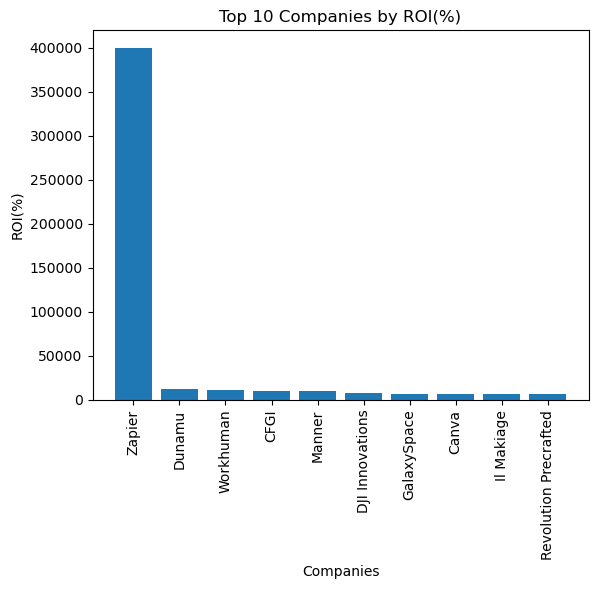

In [248]:
fig, ax = plt.subplots()
Companies = top_10_rows['Company']
ROI_values = (top_10_rows['ROI'])
ax.bar(Companies, ROI_values)
ax.set_title('Top 10 Companies by ROI(%)')
ax.set_xlabel('Companies')
ax.set_ylabel('ROI(%)')
plt.xticks(rotation=90)
plt.show()


- From the chart above we can see that the company with the highest return on investment is Zapier

### Length of time it takes to become a unicorn

In [249]:
# To Create a column for the year these companies joined:
#First convert the date column to a date time format
unicorn_companies['Date Joined'] = pd.to_datetime(unicorn_companies['Date Joined'])
#Then seperate the year from the month and day
unicorn_companies['Year Joined'] = unicorn_companies['Date Joined'].dt.year
unicorn_companies['Year Joined']

0       2017
1       2012
2       2018
3       2014
4       2011
        ... 
1069    2017
1070    2017
1071    2021
1072    2021
1073    2020
Name: Year Joined, Length: 1074, dtype: int64

In [160]:
# To establish the length of time it takes to become a unicorn company
# first clean the year founded column
null_values = unicorn_companies['Year Founded'].isnull().sum()
empty_values = (unicorn_companies['Year Founded'] == '').sum()
unicorn_companies['Length_of_time'] = ((unicorn_companies['Year Joined']) - (unicorn_companies['Year Founded']))
unicorn_companies['Length_of_time']

0        5
1       10
2       10
3        4
4        6
        ..
1069     5
1070     2
1071     3
1072    16
1073     6
Name: Length_of_time, Length: 1074, dtype: int64

In [164]:
# to establish the average length of time it takes to become a unicorn company
average_years = unicorn_companies['Length_of_time'].mean()
average_years_rounded = round(average_years, 1)
print(average_years_rounded)

7.0


- The average length of time it takes to become a unicorn company is 7years

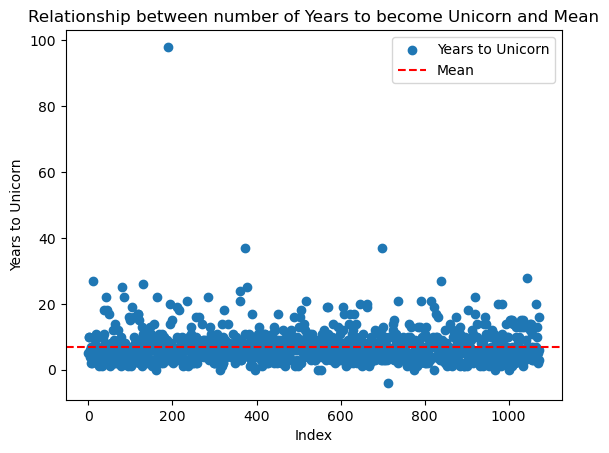

In [250]:
# To create a scatter plot demonstrating how long to it took the companies to become unicorn
plt.scatter(unicorn_companies_sorted.index, unicorn_companies['Length_of_time'], label='Years to Unicorn')

# Add a horizontal line for the mean
plt.axhline(y=average_years_rounded, color='red', linestyle='--', label='Mean')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Years to Unicorn')
plt.title('Relationship between number of Years to become Unicorn and Mean')

# Display the legend
plt.legend()

# Show the plot
plt.show()


- Scatter plot showing the relationship between length of time taken for the companies to become unicorn and the mean.
- For most of the companies, both the oldest and youngest, the length of time it took them to become unicorn revolved around seven years except for few outliers.

In [172]:
# To arrange the year founded column  to age, starting from the oldest
unicorn_companies_sorted = unicorn_companies.sort_values(by='Year Founded')
unicorn_companies_sorted = unicorn_companies_sorted.reset_index(drop=True)
print(unicorn_companies_sorted['Year Founded'])

0       1919
1       1979
2       1984
3       1990
4       1991
        ... 
1069    2021
1070    2021
1071    2021
1072    2021
1073    2021
Name: Year Founded, Length: 1074, dtype: int64


In [178]:
null_values = unicorn_companies['Year Founded'].isnull().sum()
empty_values = (unicorn_companies['Year Founded'] == '').sum()

In [251]:
#to plot a table showing top 10 countries by number of unicorn companies
countries_by_companies = unicorn_companies.groupby('Country').size().reset_index(name='Count of companies')
# Sort the data by the count in descending order
countries_by_companies = countries_by_companies.sort_values('Count of companies', ascending=False).head(10)

# Print the grouped data
print(countries_by_companies)

           Country  Count of companies
44   United States                 562
9            China                 173
19           India                  65
43  United Kingdom                  43
17         Germany                  26
16          France                  24
22          Israel                  20
7           Canada                  19
6           Brazil                  16
36     South Korea                  12


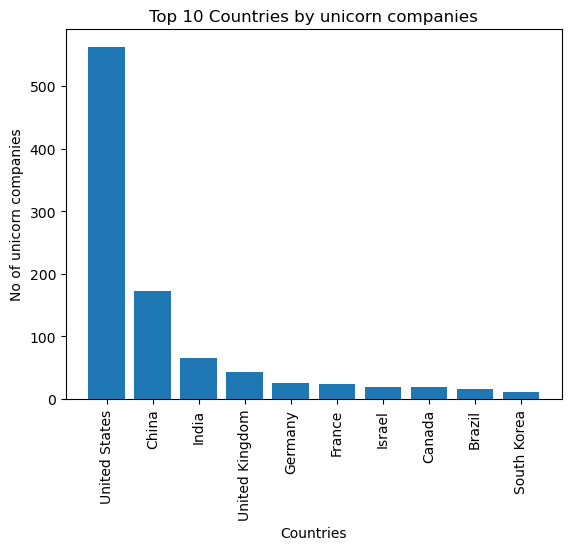

In [254]:
fig, ax = plt.subplots()
Countries = countries_by_companies['Country']
companies = (countries_by_companies['Count of companies'])
ax.bar(Countries, companies)
ax.set_title('Top 10 Countries by unicorn companies')
ax.set_ylabel('No of unicorn companies')
ax.set_xlabel('Countries')
plt.xticks(rotation=90)
plt.show()

- From the above graph, we can see that the country with highest number of unicorn companies is the USA followed by china and india respectively

In [258]:
# To demonstrate cities with the highest number of unicorn companies(Top 10):
cities_by_companies = unicorn_companies.groupby('City').size().reset_index(name='Count of companies')
# Sort the data by the count in descending order
cities_by_companies = cities_by_companies.sort_values('Count of companies', ascending=False).head(10)

print(cities_by_companies)

              City  Count of companies
200  San Francisco                 152
162       New York                 103
14         Beijing                  63
215       Shanghai                  44
131         London                  34
18       Bengaluru                  29
174          Paris                  19
216       Shenzhen                  19
172      Palo Alto                  18
21          Berlin                  17


<function matplotlib.pyplot.show(close=None, block=None)>

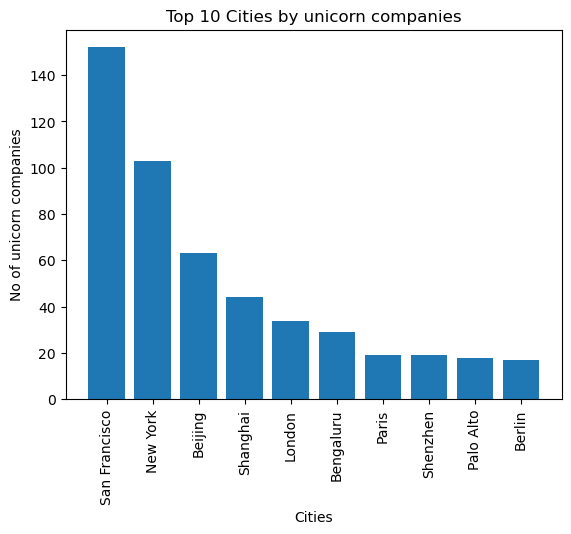

In [262]:
#To plot a bar chart demonstrating the above information:
fig, ax = plt.subplots()
Countries = cities_by_companies['City']
companies = (cities_by_companies['Count of companies'])
ax.bar(Countries, companies)
ax.set_title('Top 10 Cities by unicorn companies')
ax.set_ylabel('No of unicorn companies')
ax.set_xlabel('Cities')
plt.xticks(rotation=90)
plt.show

- San Francisco and new york seem to be the biggest industries hub by the number of unicorn companies there followed closely by beijing.

In [259]:
# Investors with the most unicorns
investors_by_companies = unicorn_companies.groupby('Select Investors').size().reset_index(name='Count of companies')
# Sort the data by the count in descending order
investors_by_companies = investors_by_companies.sort_values('Count of companies', ascending=False).head(10)

# Print the grouped data
print(investors_by_companies)

                                      Select Investors  Count of companies
785                                    Sequoia Capital                   3
887        Speedinvest, Valar Ventures, Uniqa Ventures                   2
976  Two Sigma Ventures, Flint Capital, Commerce Ve...                   2
355                                   General Atlantic                   2
843  Shunwei Capital Partners, China Media Group, G...                   2
413      Greylock Partners, Google Ventures, BlackRock                   2
745          Qualcomm Ventures, Accel, Canaan Partners                   2
384  Global Founders Capital, Shea Ventures, Greycroft                   2
802  Sequoia Capital China, Qiming Venture Partners...                   2
962  Tiger Global Management, Sequoia Capital India...                   2


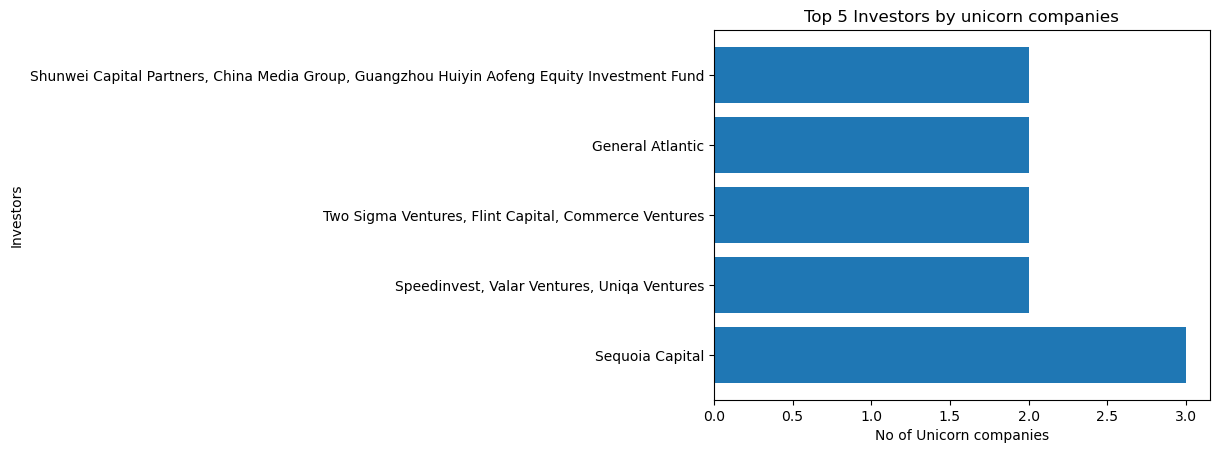

In [214]:
fig, ax = plt.subplots()
Investors = investors_by_companies['Select Investors']
No_of_unicorns = (investors_by_companies['Count'])
ax.barh(Investors, No_of_unicorns)
ax.set_title('Top 5 Investors by unicorn companies')
ax.set_ylabel('Investors')
ax.set_xlabel('No of Unicorn companies')
plt.xticks(rotation=0)
plt.show()


- From the table above we can conclude that the investor with the highest number of unicorn companies in their portfolio is Sequoia Capitals

- Calculate the average valuation and funding amounts for unicorn companies in each industry and geographical region. This analysis will help prioritize investment in companies with a track record of significant growth and attract potential investors looking for high returns.

In [265]:
# The median valuation of unicorn companies:
median_valuation = unicorn_companies['Valuation_B'].median()
median_Valuation_rounded = round(median_valuation, 1)
# Print the median valuation
print(median_valuation)


2000000000.0


- The median valuation of unicorn companies in our data set is 2Billion dollars

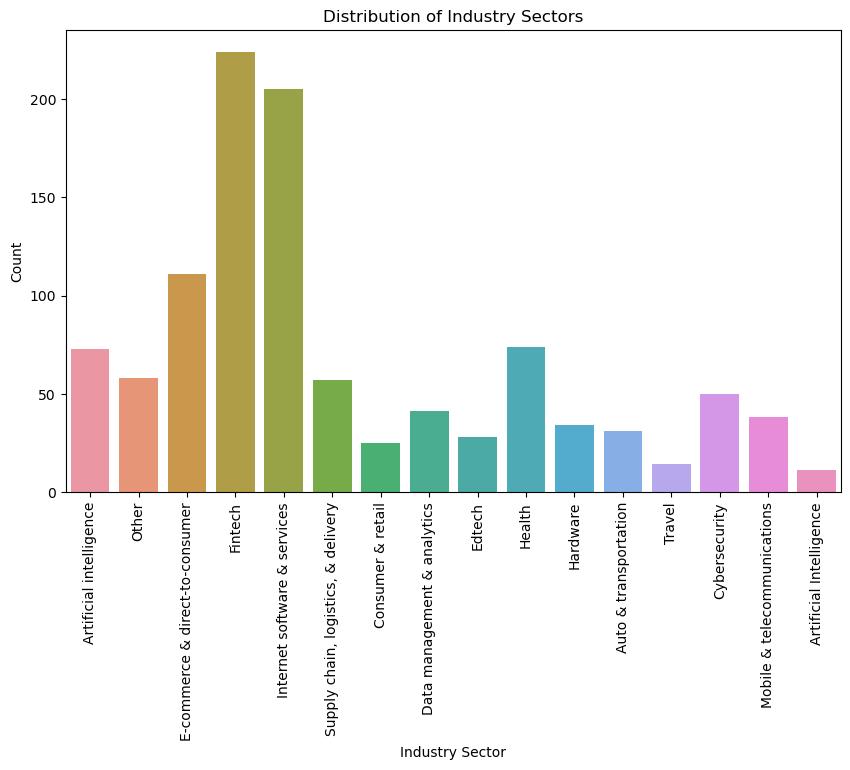

In [199]:
# univariate analysis
# Industry Sector
plt.figure(figsize=(10, 6))
sns.countplot(data=unicorn_companies, x='Industry')
plt.title('Distribution of Industry Sectors')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [228]:

countries_by_companies = unicorn_companies.groupby('Country').size().reset_index(name='Count')
# Sort the data by the count in descending order
Countries_by_companies_sorted = countries_by_companies.sort_values('Count', ascending=False).head(10)

# Print the grouped data
print(Countries_by_companies_sorted)

           Country  Count
44   United States    562
9            China    173
19           India     65
43  United Kingdom     43
17         Germany     26
16          France     24
22          Israel     20
7           Canada     19
6           Brazil     16
36     South Korea     12


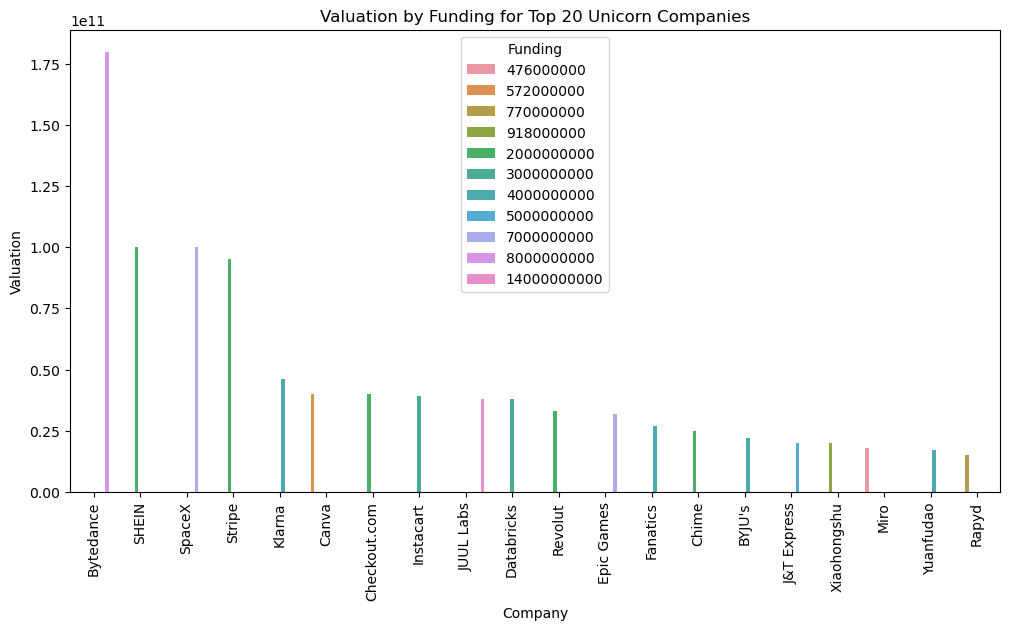

In [232]:
# Drop rows with missing values
data = unicorn_companies.dropna()
# Sort the data by valuation in descending order
data_sorted = data.sort_values(by='Valuation_B', ascending=False)
# Get the top 20 unicorn companies by valuation
top_20_unicorns = data_sorted.head(20)

# Valuation by Funding for Top 20 Unicorn Companies
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_unicorns, x='Company', y='Valuation_B', hue='Funding')
plt.title('Valuation by Funding for Top 20 Unicorn Companies')
plt.xlabel('Company')
plt.ylabel('Valuation')
plt.xticks(rotation=90)
plt.legend(title='Funding')
plt.show()


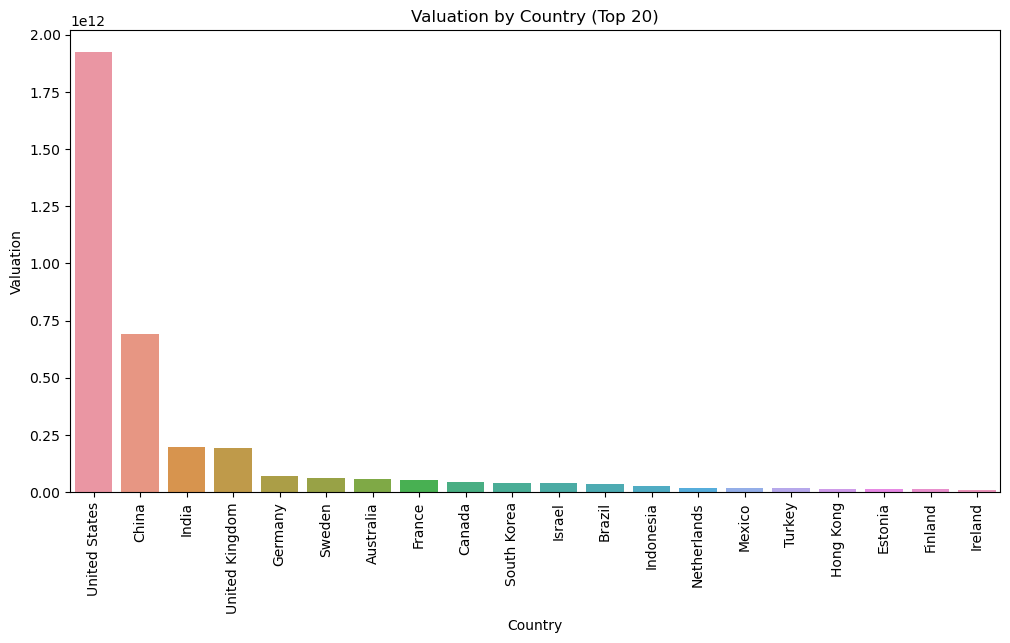

In [238]:
#To calculate the top 20 countries by their unicorn companies' valuation:
# Drop rows with missing values
data = unicorn_companies.dropna()

# Group the data by country and calculate the total valuation
country_totals = data.groupby('Country').agg({'Valuation_B': 'sum'}).reset_index()

# Sort the data by valuation in descending order
country_totals_sorted = country_totals.sort_values(by='Valuation_B', ascending=False)

# Get the top 20 countries by valuation
top_20_countries = country_totals_sorted.head(20)

# Valuation by Country for Top 20
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_countries, x='Country', y='Valuation_B')
plt.title('Valuation by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Valuation')
plt.xticks(rotation=90)
plt.show()


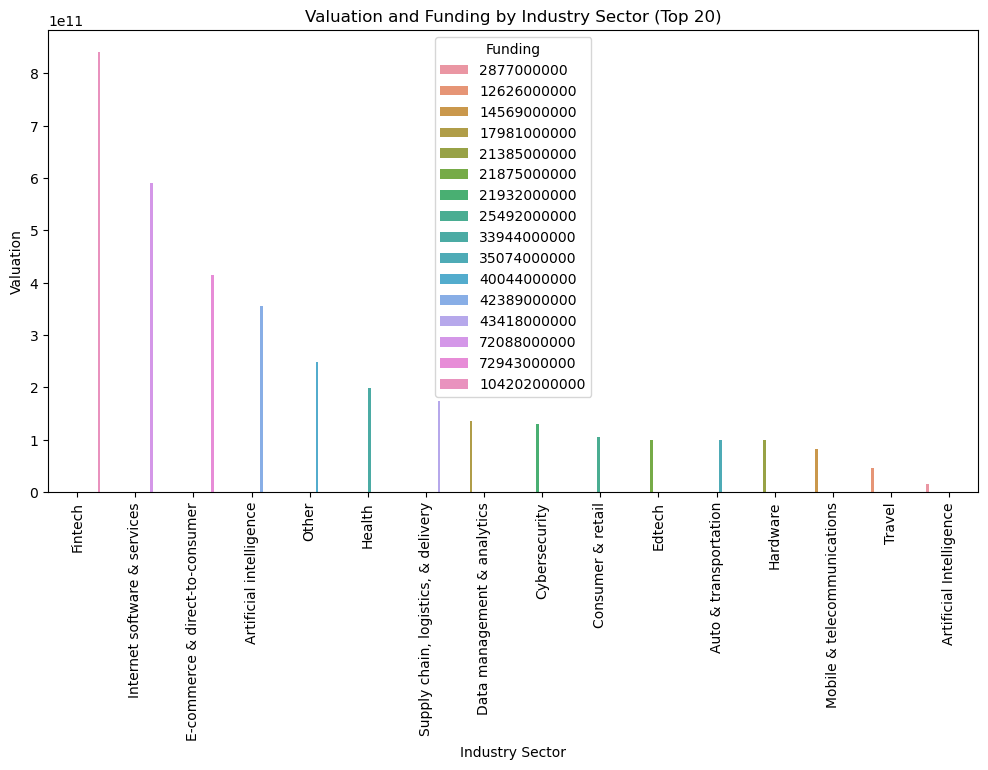

In [235]:
data = unicorn_companies.dropna()
# Group the data by industry sector and calculate the total valuation and funding
industry_totals = data.groupby('Industry').agg({'Valuation_B': 'sum', 'Funding': 'sum'}).reset_index()

# Sort the data by valuation in descending order
industry_totals_sorted = industry_totals.sort_values(by='Valuation_B', ascending=False)

# Get the top 20 industry sectors by valuation
top_20_industries = industry_totals_sorted.head(20)

# Valuation and Funding by Industry Sector for Top 20
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_industries, x='Industry', y='Valuation_B', hue='Funding')
plt.title('Valuation and Funding by Industry Sector (Top 20)')
plt.xlabel('Industry Sector')
plt.ylabel('Valuation')
plt.xticks(rotation=90)
plt.legend(title='Funding')
plt.show()


- From the chart above we observe that fintech and internet software services attracts the biggest funding, followed closely by E-commerce and artificiial intelligence.

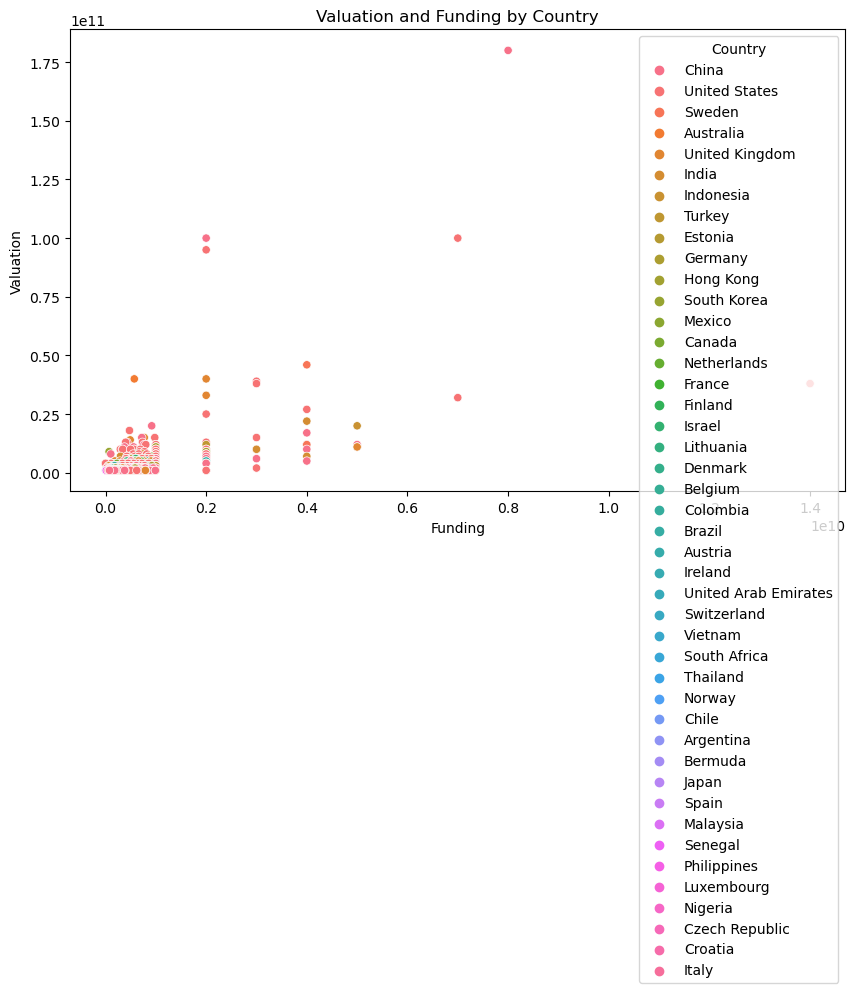

In [207]:
#Valuation, Funding, and Country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=unicorn_companies.dropna(), x='Funding', y='Valuation_B', hue='Country')
plt.title('Valuation and Funding by Country')
plt.xlabel('Funding')
plt.ylabel('Valuation')
plt.legend(title='Country')
plt.show()

- From the chart above we can see that well funded companies in china and the united states have the biggest valuations

## Our Recommendations:
- Companies aspiring to become unicorns should establish their presence in countries like USA and china as these countries probably have better conditions that have allowed greater number of unicorn companies to emerge compared to other countries.
- Companies aspiring to become unicorn should try to get funding from the likes of Sequoia Capital, Speedinvest, Valar Ventures, Uniqa Ventures as they are the leading investors by their unicorn company portfolio.
- investing in fintech and software services sector is very likely to yield greater return on investments as there are much more unicorn companies in these sectors compared to other sectors.
- There doesnt seem to be any tangible relationship between the age of a company and its valuation. However, the average number of years it takes a company to become a unicorn company is 7 years. Companies aspiring to become unicorn should be able to demonstrate good leadership that will ensure the companies longevity beyond that average. 